In [47]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import us

In [12]:
%matplotlib inline

In [44]:
df = pd.DataFrame(json.load(open("out/congressional_test.json")))
medians = df.median() * 100 - 4.55

Text(0, 0.5, 'Frequency')

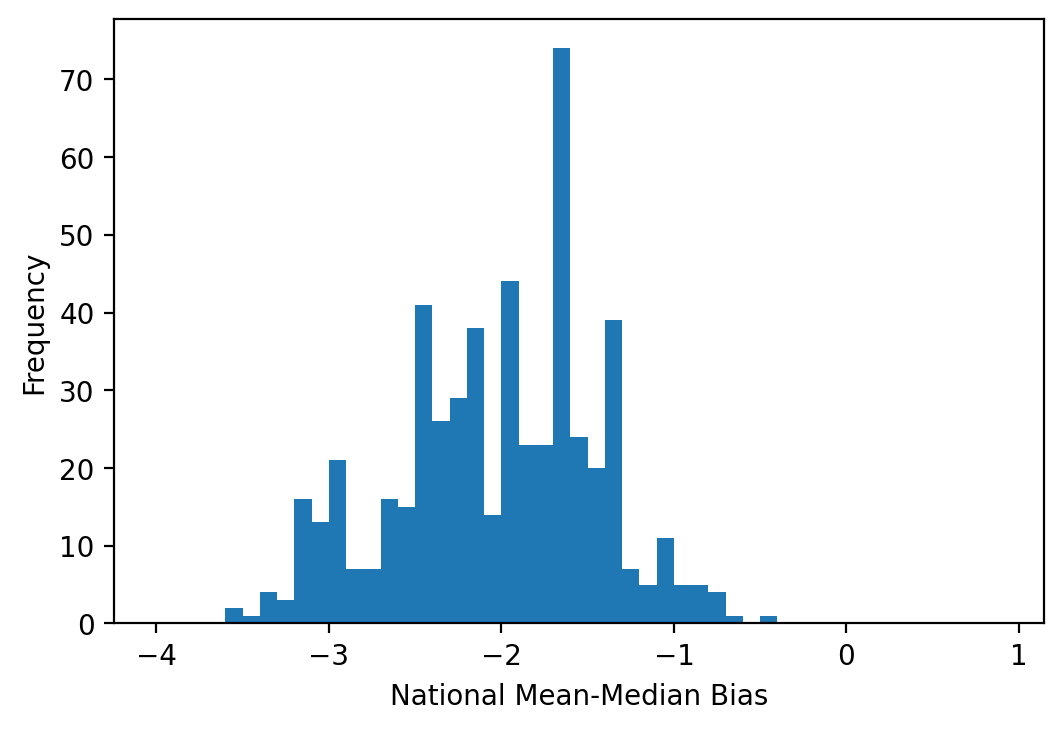

In [80]:
plt.figure(dpi=200)
a = np.floor(min(medians))
b = np.ceil(max(medians)) + 1
plt.hist(medians, bins=np.arange(a, b, 0.1))
plt.xlabel("National Mean-Median Bias")
plt.ylabel("Frequency")

0

In [96]:
plans = {}
gop_plans = {}
result = {}
for x in us.states.STATES:
    for_state = df.loc[[y for y in df.index if y.startswith(x.abbr)]]
    dem_count = (for_state > 0).mean()
    gop_count = 1 - dem_count
    seat_margin = dem_count - gop_count
    partisan_bias = seat_margin.mean() - for_state.mean().mean()
    result[x.abbr] = partisan_bias
    plans[x.abbr] = int(dem_count.argmax())
    gop_plans[x.abbr] = int(dem_count.argmin())

In [97]:
with open("out/best_dem.json", "w") as f:
    json.dump(plans, f)
with open("out/best_gop.json", "w") as f:
    json.dump(gop_plans, f)